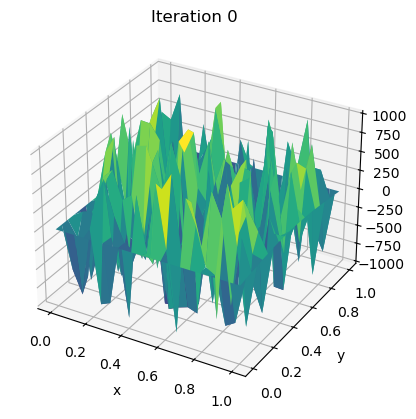

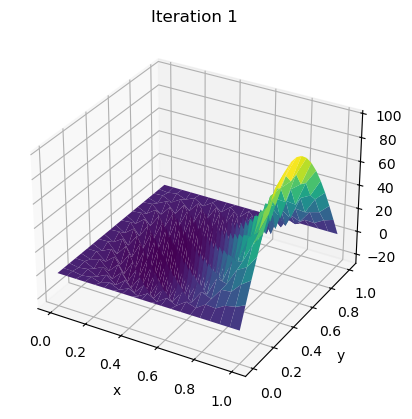

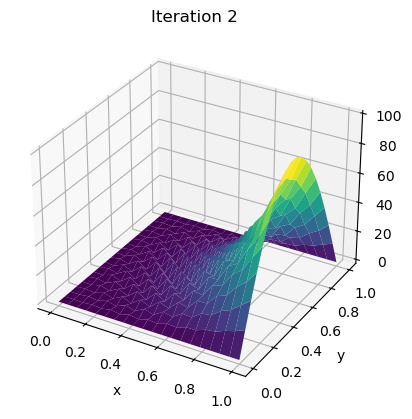

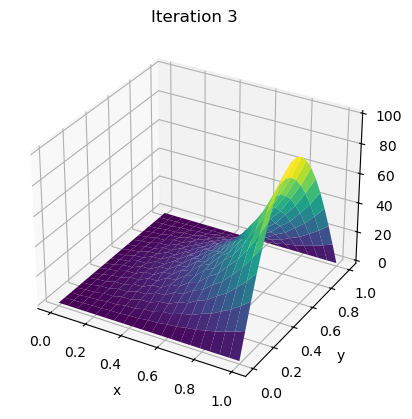

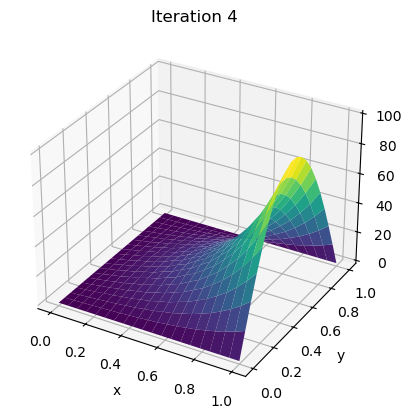

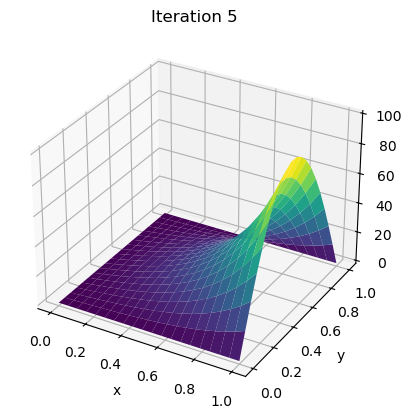

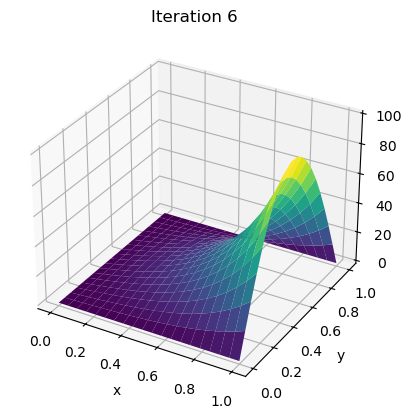

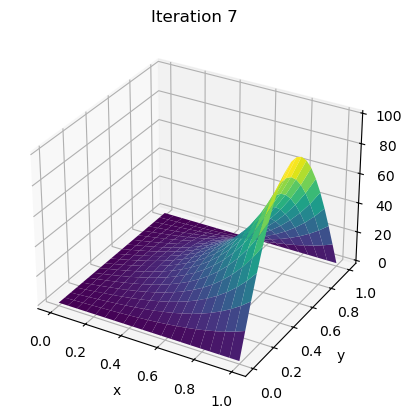

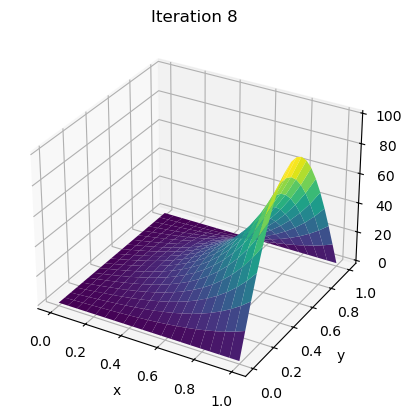

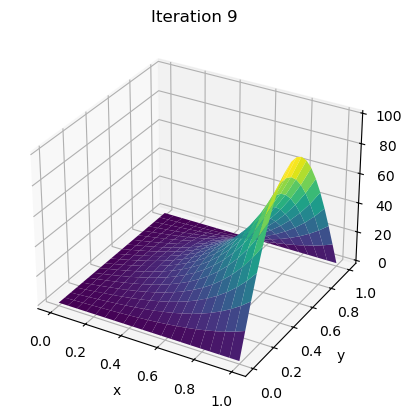

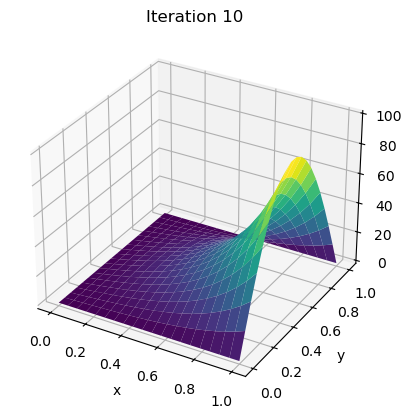

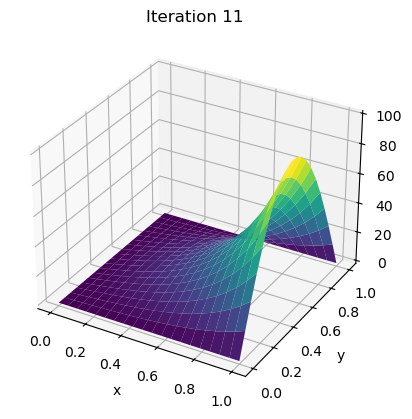

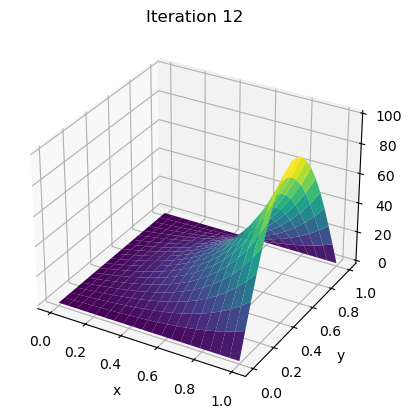

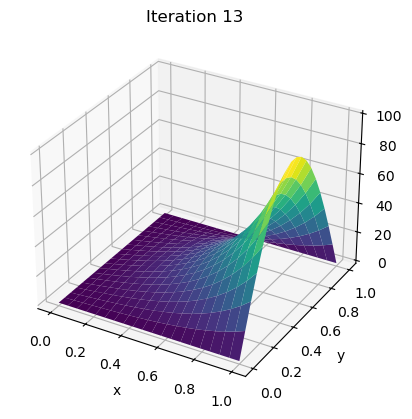

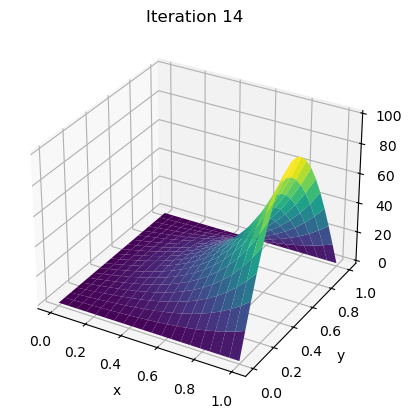

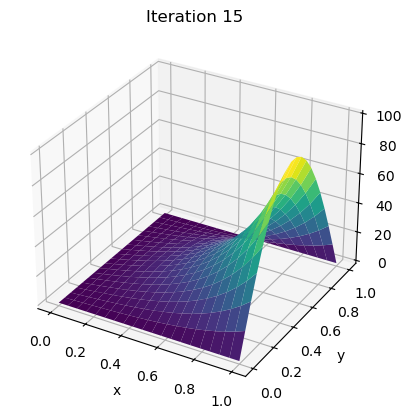

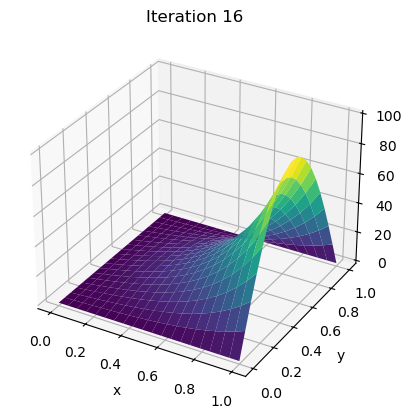

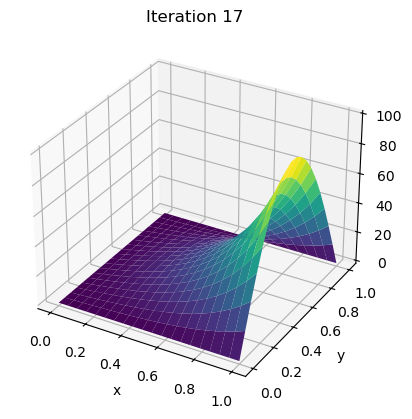

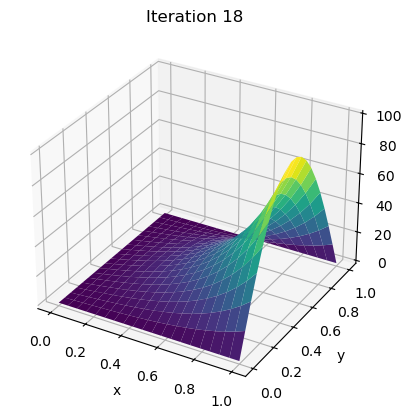

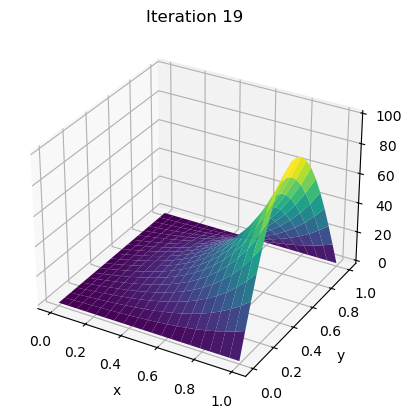

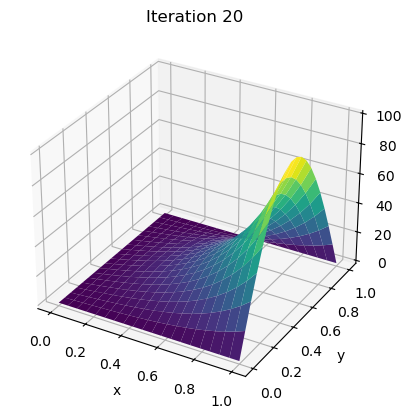

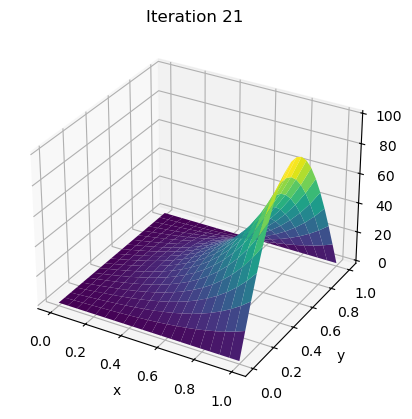

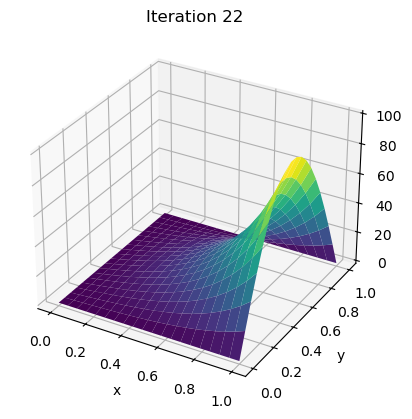

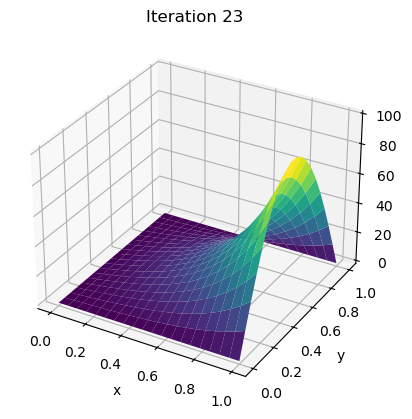

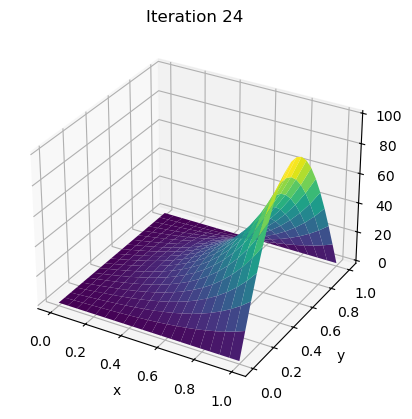

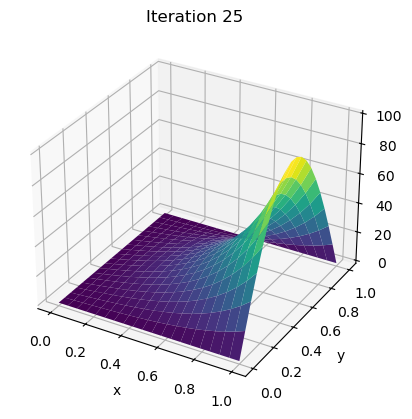

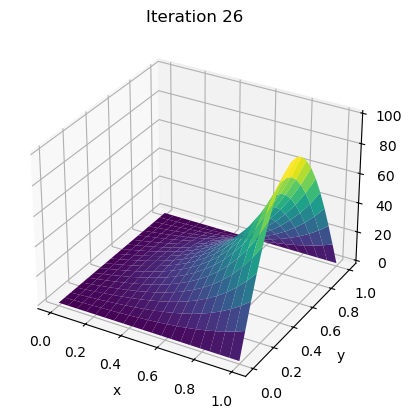

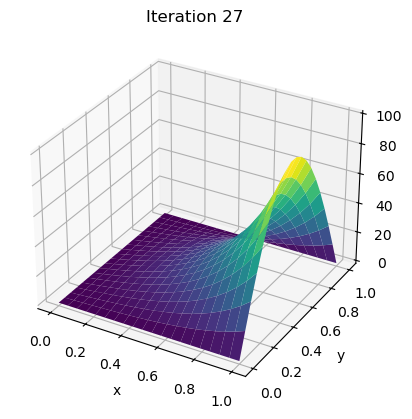

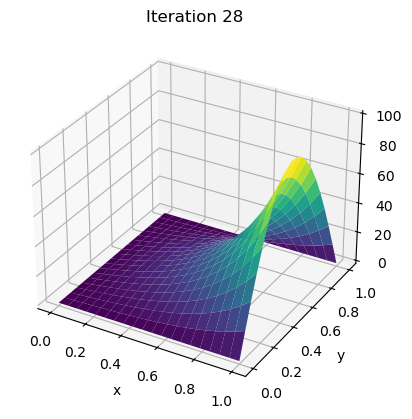

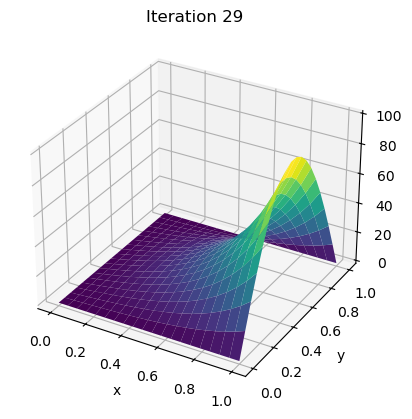

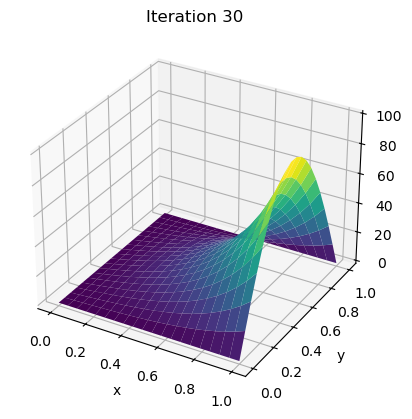

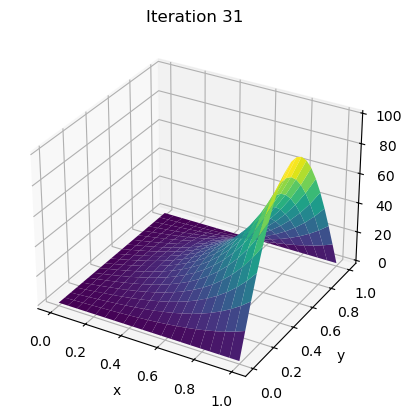

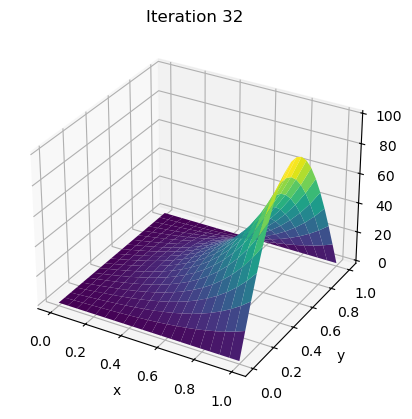

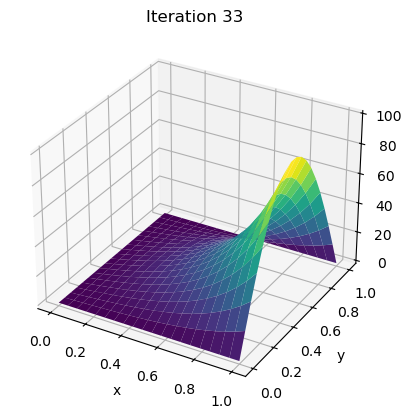

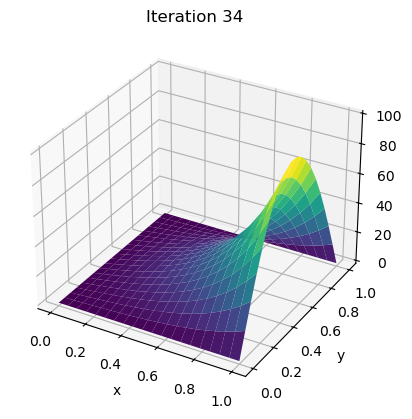

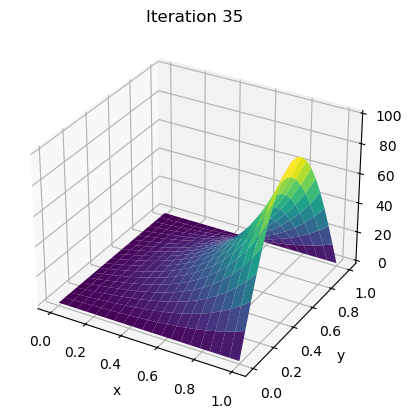

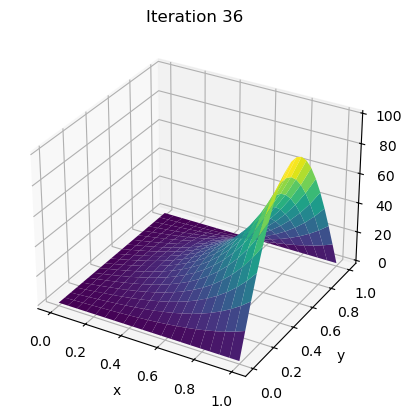

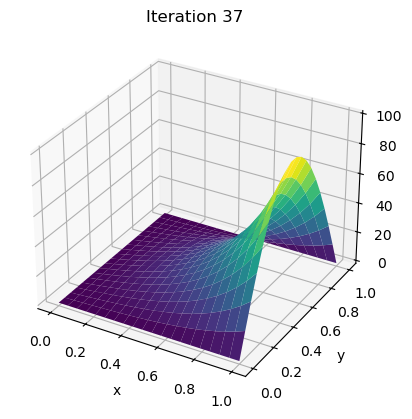

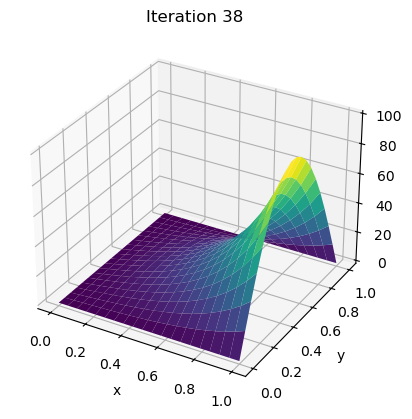

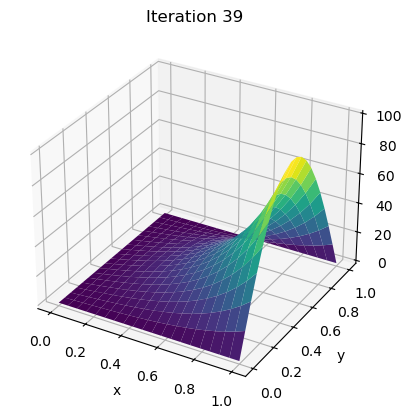

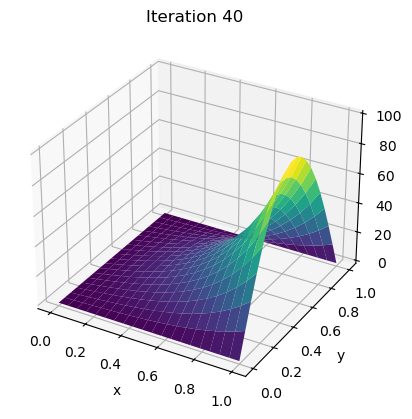

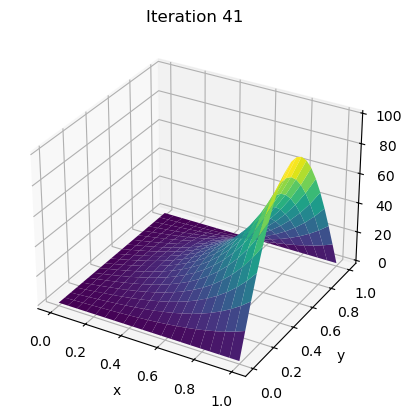

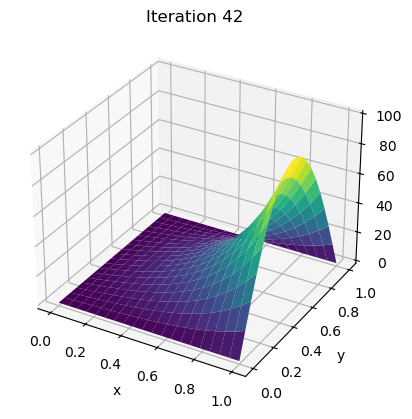

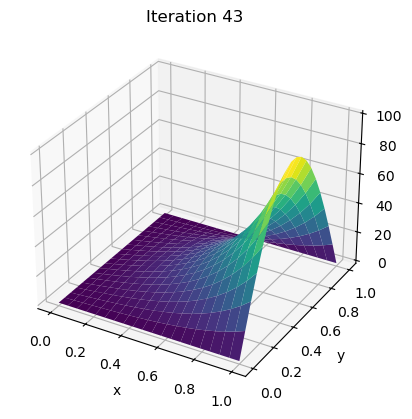

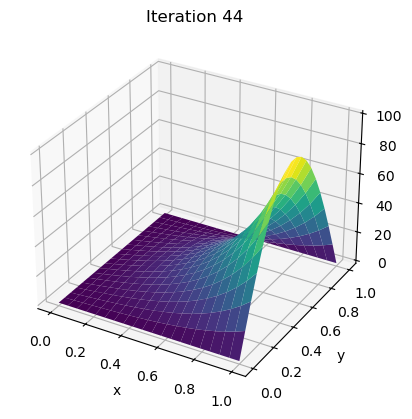

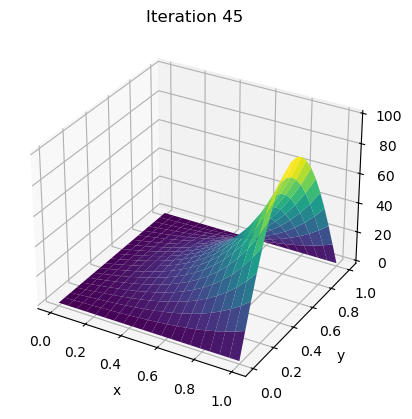

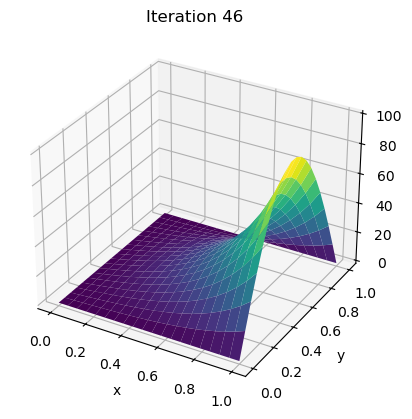

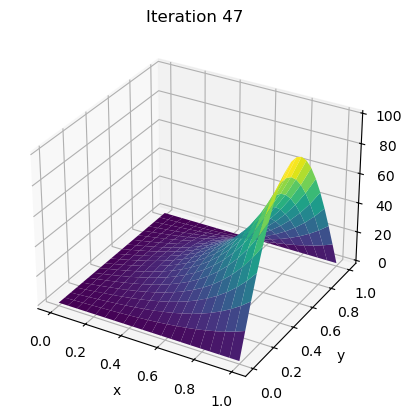

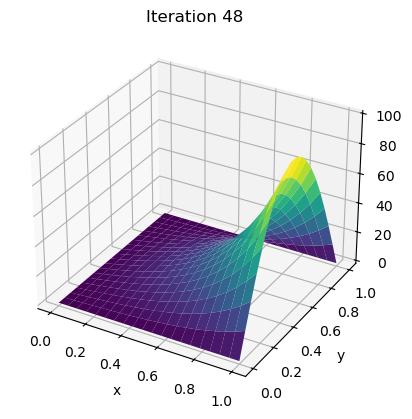

KeyboardInterrupt: 

In [2]:
# Python translation of the Yuri's notebook into Python using NumPy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Grid setup
xmin, xmax = 0, 1
ymin, ymax = 0, 1
gridsize = 20

dx = (xmax - xmin) / (gridsize - 1)
dy = (ymax - ymin) / (gridsize - 1)

# Define electrostatic potential array
phi = np.zeros((gridsize, gridsize))

# Initialize phi with random values
phi = np.random.uniform(-1000, 1000, size=(gridsize, gridsize))

# Set boundary conditions
phi[0, -1] = 0
phi[-1, -1] = 0
phi[:, 0] = 0
# Additional boundary condition
phi[:, -1] = 100 * np.sin(np.pi * np.array([i for i in range(gridsize)]) / (gridsize - 1))

# Number of iterations
itermax = 10_000

# Initialize a list to store phi snapshots, store initial Phi
figs = [np.copy(phi)]

# Iterative relaxation method
for iter in range(1, itermax + 1):
    PreviousPhi = phi.copy()

    # Its much more efficient to update all vertices simultaneously
    # This is contrary to class where the algorithm was described as iterating
    # through each vertice and updating one at a time
    phi[1:-1, 1:-1] = 0.25 * (
        PreviousPhi[:-2, 1:-1] +  # Above
        PreviousPhi[2:, 1:-1] +   # Below
        PreviousPhi[1:-1, :-2] +  # Left
        PreviousPhi[1:-1, 2:]     # Right
    )

    if iter % 100 == 0:
        figs.append(np.copy(phi))

# Visualization of iteration steps
for n, fig in enumerate(figs):
    fig3d = plt.figure()
    ax = fig3d.add_subplot(111, projection='3d')
    x = np.linspace(xmin, xmax, gridsize)
    y = np.linspace(ymin, ymax, gridsize)
    X, Y = np.meshgrid(x, y)
    ax.plot_surface(X, Y, fig, cmap='viridis')
    plt.title(f"Iteration {n}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

# Interpolation of the potential
from scipy.interpolate import RegularGridInterpolator
x = np.linspace(xmin, xmax, gridsize)
y = np.linspace(ymin, ymax, gridsize)
iPhi = RegularGridInterpolator((x, y), phi)

def Phi(x, y):
    return iPhi((x, y))

# Contour plot
X, Y = np.meshgrid(x, y)
plt.contour(X, Y, phi, levels=20)
plt.title("Contour Plot of Potential")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="Potential Φ")
plt.show()

# Analytical solution
from math import sinh, sin, pi

def Phiform(x, y):
    return 100 * sin(pi * x) * sinh(pi * y) / sinh(pi)

# Example of analytical solution plot
X, Y = np.meshgrid(x, y)
Z = np.array([[Phiform(xi, yi) for xi, yi in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])
fig3d = plt.figure()
ax = fig3d.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.title("Analytical Solution")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
